# Analyze Region 12 - Caucasus and Middle East

This notebook analyzes the largest glaciers in Region 12 - Caucasus and Middle East

In [1]:
import os
import os.path as op
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio as rio
from rasterio.plot import plotting_extent
from earthpy import clip as cl
import earthpy.plot as ep

# set working dir
HOME = op.join(op.expanduser("~"))
os.chdir(os.path.join(HOME, "git/wgms-glacier-project"))

# Set up path to load scripts
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import scripts.wgms_scripts as ws

# Set Up Region Info

In [2]:
# Set region number, region name, and region index
# Once these are set, this notebook should run automatically for the specified region
region_number = "12"
region_name = "Caucasus and Middle East"

# The variable primeclass needs to be updated with the primary class of the ice complexes for the region
# This may need to be a list in some instances
# 2: icefield, 3: ice cap, 4: outlet glacier, 5: valley glacier, 6: mountain glacier
primeclass = 5 # These are in mountains but also could be valley glaciers. The literature calls them valley glaciers.

# Note for the region index, region_index_1 should be one less than the region number and 
# region_index_2 should be equal to the region number. For example, for region 1, index_1 should be set to 0 and 
# index_2 should be set to 1, etc.
region_index_1 = 11
region_index_2 = 12

# This variable sets a value to determine whether the differences between the GLIMS and RGI glacier have been checked.
# When first starting a new notebook set handled to 0
# Once the differences have been checked and handled, set to 1 to pass the check 
# in the Compare Glaciers from GLIMS and RGI section towards the middele of this notebook.
handled = 1

# Show Region

In [3]:
# Open natural earth basemap TIF file
ne_fp = 'data/natural-earth/NE1_HR_LC_SR_W/NE1_HR_LC_SR_W.tif' # 10 m res
with rio.open(ne_fp) as ne_src:
    # Convert / read the data into a numpy array:
    ne_raster = ne_src.read()
    ne_src_extent = plotting_extent(ne_src)
    bounds = ne_src.bounds
    ne_raster_meta = ne_src.meta

In [4]:
# Open glacier regions
glacier_regions_fp = "data/gtn-g-glacier-regions/cleaned/GTN-G_glacier_regions_201707_cleaned.shp"
glacier_regions = gpd.read_file(glacier_regions_fp)

# Extract Region outline
region_outline = glacier_regions[region_index_1:region_index_2]

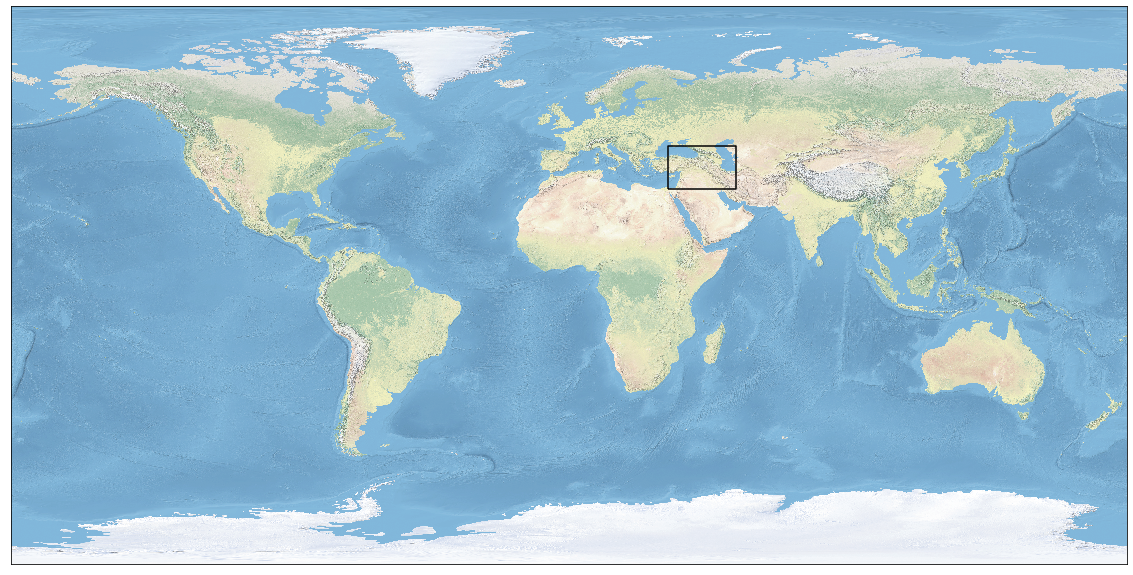

In [5]:
# Plot region outline over the natural earth
# Plot natural earth basemap
fig, ax = plt.subplots(figsize=(20, 20))

# Plot natural earth
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot region outline
region_outline.boundary.plot(ax=ax, color="black")

plt.show()

In [6]:
region_outline.bounds

,minx,miny,maxx,maxy
11,32.0,31.0,54.0,45.0


# Glaciers

## Open GLIMS 3 Largest Glaciers Data

In [7]:
# Open GLIMS three largest glacier outlines for this region.
glims_glaciers_fn = "data/glims/processed/largest/glims_region_" + region_number + "_largest.shp"
glims_glaciers_df = gpd.read_file(glims_glaciers_fn)

In [8]:
# Check if GLIMS glacier names are of the "NoneType" because can't print legends and such if they are
# If they are, set them to a string "NONE"
glims_df_len = len(glims_glaciers_df)
for x in range(glims_df_len):
    if glims_glaciers_df['glac_name'][x] == None:
        print("GLIMS glacier " + str(x) + " equals none")
        glims_glaciers_df.loc[x, 'glac_name'] = 'NONE'

In [9]:
glims_glaciers_df

,region_no,glac_id,area,db_area,width,length,primeclass,min_elev,mean_elev,max_elev,src_date,glac_name,geometry
0,12,G043100E43030N,37.4914,37.4991,0.0,0.0,0.0,0.0,0.0,0.0,2014-08-03T07:49:37,Ulluchirak,"POLYGON Z ((43.066358 43.014609 0, 43.065336 4..."
1,12,G043183E42984N,27.5349,27.5420,0.0,0.0,0.0,0.0,0.0,0.0,2014-08-03T07:49:37,Dikh-kotiu-bugoisy,"POLYGON Z ((43.138395 43.013094 0, 43.138366 4..."
2,12,G043748E42782N,23.9915,24.0045,0.0,0.0,0.0,0.0,0.0,0.0,2014-08-03T07:49:37,Karaugom,"POLYGON Z ((43.761883 42.792313 0, 43.76203 42..."
3,12,G042766E43151N,23.7692,23.7695,0.0,0.0,0.0,0.0,0.0,0.0,2014-08-03T07:49:37,Lekhziri,"POLYGON Z ((42.73108 43.181932 0, 42.731246 43..."
4,12,G042506E43356N,21.4396,21.4354,0.0,0.0,0.0,0.0,0.0,0.0,2014-08-03T07:49:37,Kinchiroirt,"POLYGON Z ((42.5572 43.375623 0, 42.557648 43...."


## Open RGI 3 Largest Glaciers Data

In [10]:
# Open RGI three largest glacier outlines for this region.
rgi_glaciers_fn = "data/rgi/processed/largest/rgi_region_" + region_number + "_largest.shp"
rgi_glaciers_df = gpd.read_file(rgi_glaciers_fn)

In [11]:
# Check if RGI glacier names are of the "NoneType" because can't print legends and such if they are
# If they are, set them to a string "NONE"
rgi_df_len = len(rgi_glaciers_df)
for x in range(rgi_df_len):
    if rgi_glaciers_df['Name'][x] == None:
        print("RGI glacier " + str(x) + " equals none")
        rgi_glaciers_df.loc[x, 'Name'] = 'NONE'

In [12]:
rgi_glaciers_df

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
0,RGI60-12.01005,G042748E43156N,20010915,-9999999,42.7479,43.1560,12,1,31.076,2168,...,253,11554,0,0,0,0,9,9,SU5T09105247,"POLYGON ((42.77902200000005 43.18760900000007,..."
1,RGI60-12.01252,G043084E43033N,20010915,-9999999,43.0840,43.0332,12,1,29.959,2143,...,16,16992,0,0,0,0,9,1,SU4G08007001 Bezengi Glacier,"POLYGON ((43.13495000000006 43.10652900000008,..."
2,RGI60-12.00611,G043751E42785N,19990818,-9999999,43.7512,42.7850,12,1,26.233,1890,...,319,13205,0,0,0,0,9,9,SU4G08008049,"POLYGON ((43.71724000000006 42.81615000000005,..."
3,RGI60-12.01061,G042519E43359N,20000912,-9999999,42.5192,43.3588,12,1,20.975,3233,...,51,9410,0,0,0,0,9,9,SU4G08005006,"POLYGON ((42.55329000000006 43.38119000000006,..."
4,RGI60-12.00080,G042422E43310N,20000912,-9999999,42.4219,43.3100,12,1,15.917,2668,...,174,9839,0,0,0,0,3,9,Bolshoy Azau,"POLYGON ((42.43052000000006 43.35431000000005,..."


## Plot GLIMS Glaciers

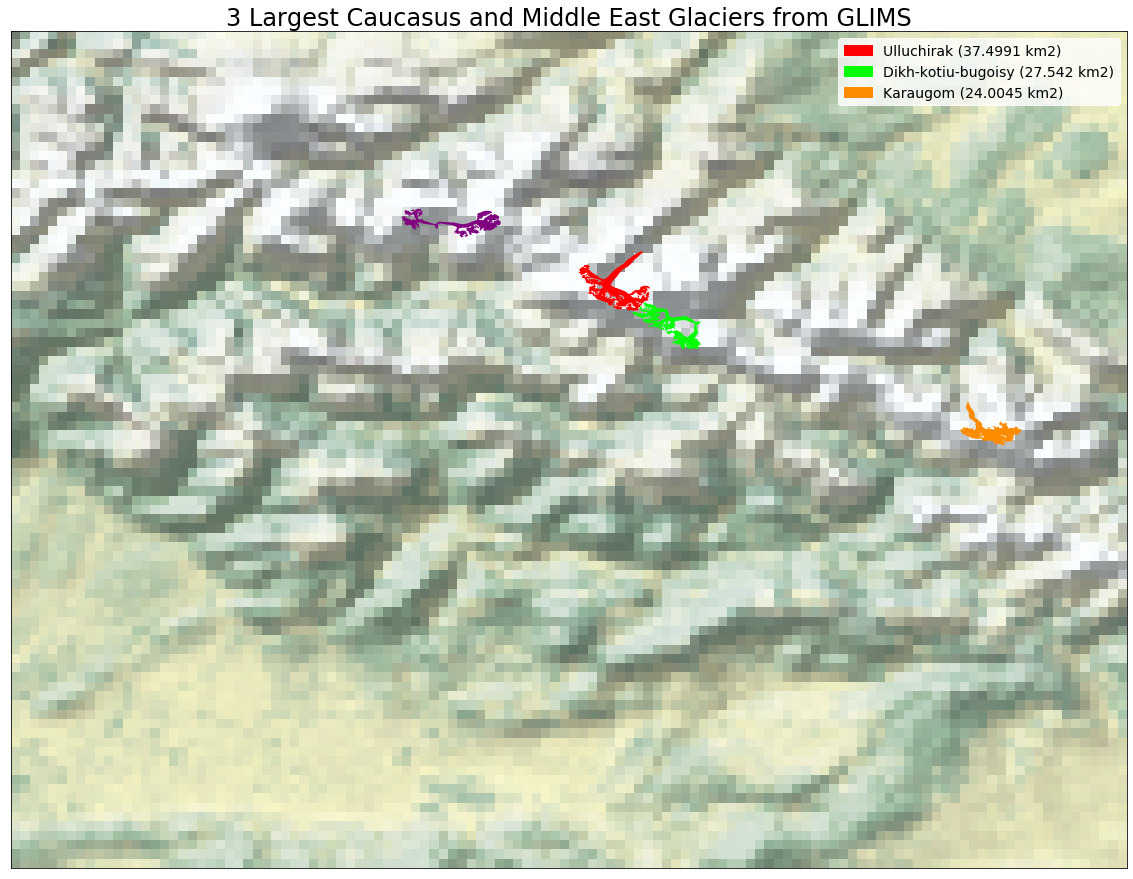

In [13]:
# Plot 3 largest glaciers on natural earth from GLIMS
legend_colors = ['red', 'lime', 'darkorange']
legend_labels = [glims_glaciers_df['glac_name'][0] + ' (' + str(glims_glaciers_df['db_area'][0]) + ' km2)',
                 glims_glaciers_df['glac_name'][1] + ' (' + str(glims_glaciers_df['db_area'][1]) + ' km2)',
                 glims_glaciers_df['glac_name'][2] + ' (' + str(glims_glaciers_df['db_area'][2]) + ' km2)']
legend_patches = [Patch(color=icolor, label=label)
                  for icolor, label in zip(legend_colors, legend_labels)]

# Set up plot space
fig, ax = plt.subplots(figsize=(20,20))
minx, miny, maxx, maxy = region_outline.total_bounds
# Zoom in
miny = 42.0
maxy = 43.5
minx = 42.0
maxx = 44.0
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot natural earth basemap
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot 3 largest glaciers from glims dataframe
glims_glaciers_df.iloc[0:1].plot(ax=ax, color='red')
glims_glaciers_df.iloc[1:2].plot(ax=ax, color='lime')
glims_glaciers_df.iloc[2:3].plot(ax=ax, color='darkorange')
glims_glaciers_df.iloc[3:4].plot(ax=ax, color='purple')
ax.set_title('3 Largest ' + region_name + ' Glaciers from GLIMS', fontsize=24)
# Plot legend
ax.legend(handles=legend_patches,
         facecolor ="white",
         edgecolor = "white",
         fontsize = 14,
         bbox_to_anchor = (1.0,1.0))

plt.show()

## Plot RGI Glaciers

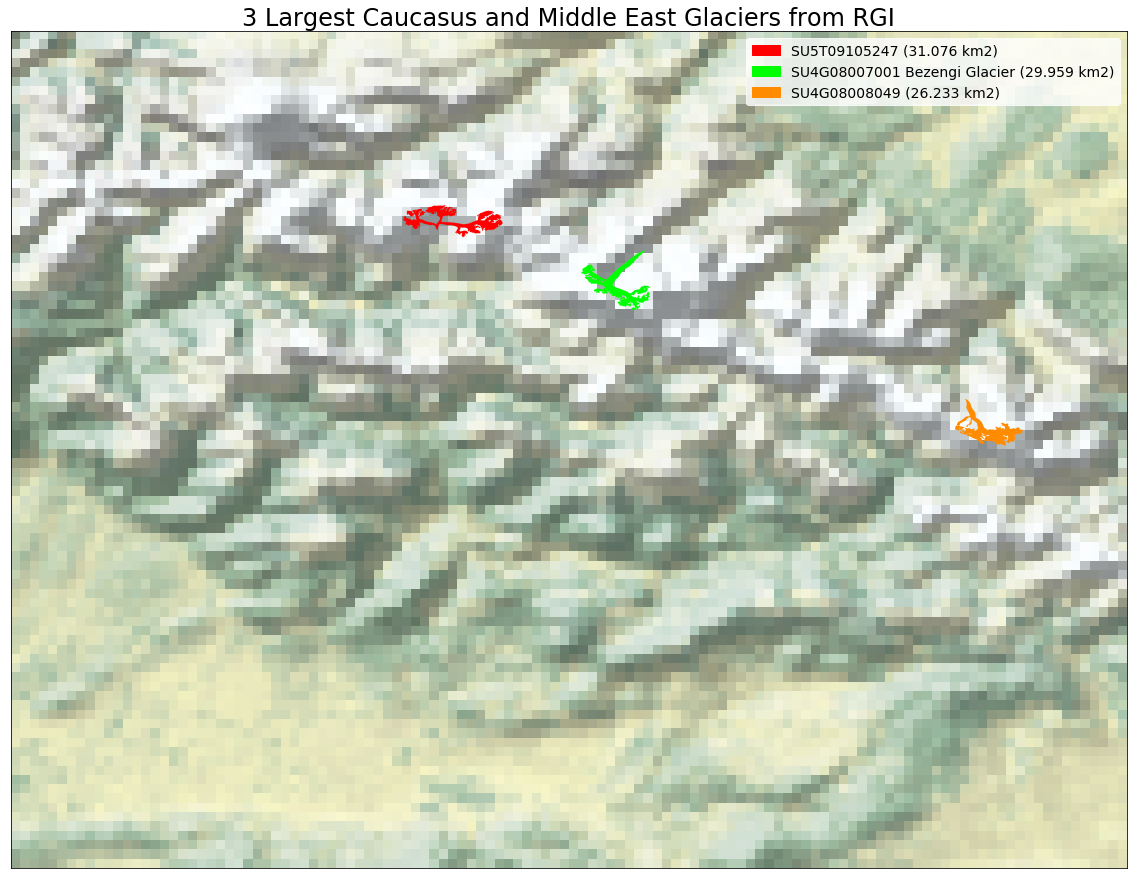

In [14]:
# Plot 3 largest glaciers on natural earth from RGI
legend_colors = ['red', 'lime', 'darkorange']
legend_labels = [rgi_glaciers_df['Name'][0] + ' (' + str(rgi_glaciers_df['Area'][0]) + ' km2)',
                 rgi_glaciers_df['Name'][1] + ' (' + str(rgi_glaciers_df['Area'][1]) + ' km2)',
                 rgi_glaciers_df['Name'][2] + ' (' + str(rgi_glaciers_df['Area'][2]) + ' km2)']
legend_patches = [Patch(color=icolor, label=label)
                  for icolor, label in zip(legend_colors, legend_labels)]

# Set up plot space
fig, ax = plt.subplots(figsize=(20,20))
minx, miny, maxx, maxy = region_outline.total_bounds
# Zoom in
miny = 42.0
maxy = 43.5
minx = 42.0
maxx = 44.0
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot natural earth basemap
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot 3 largest glaciers from rgi dataframe
rgi_glaciers_df.iloc[0:1].plot(ax=ax, color='red')
rgi_glaciers_df.iloc[1:2].plot(ax=ax, color='lime')
rgi_glaciers_df.iloc[2:3].plot(ax=ax, color='darkorange')
ax.set_title('3 Largest ' + region_name + ' Glaciers from RGI', fontsize=24)
# Plot legend
ax.legend(handles=legend_patches,
         facecolor ="white",
         edgecolor = "white",
         fontsize = 14,
         bbox_to_anchor = (1.0,1.0))

plt.show()

## Compare Glaciers from GLIMS and RGI
Do they match? If yes, continue, if no, stop notebook and investigate

In [15]:
if (glims_glaciers_df['glac_name'][0] == rgi_glaciers_df['Name'][0] and 
    glims_glaciers_df['glac_name'][1] == rgi_glaciers_df['Name'][1] and 
    glims_glaciers_df['glac_name'][2] == rgi_glaciers_df['Name'][2]):
    print("They match!")
else:
    if handled != 1:
        # If this hasn't been handled, stop execution
        class StopExecution(Exception):
            def _render_traceback_(self):
                pass

        print("They do NOT Match! Stopping notebook.")
        raise StopExecution
    else:
        # If this has been handled, continue execution
        print("They do not match but this has been handled in the code below this section, so continue.")

They do not match but this has been handled in the code below this section, so continue.


## Create final shapefiles
This section creates and formats the final dataframe, plots it to make sure it looks ok, and saves it to a shapefile.

GLIMS and RGI do not exactly match

* The 1st larget in GLIMS (Ulluchirak) has a different name in RGI (Bezengi Glacier) and is 2nd largest. Heid and Kaab (2012) say Bezengi is largest in area. When I search Ulluchirak, I don't get any results but when I search Bezengi, I do. I think I will go with Bezengi as the name for this glacier.
* The 2nd largest in GLIMS (Dikh-kotiu-bugoisy - G043183E42984N) is broken up into, I think, 2 glaciers in RGI (RGI60-12.00521 and RGI60-12.00577). When I look at this in WGMS FOG browser, it's possilbe the left portion of the glacier is Dikh, but the right portion isn't named. Could it be Bugoisy and GLIMS put the two glacier together? RGI doesn't have names for them. Tielidze et al. (2017) does list this as a glacier but this paper has only been submitted and not published. But GLIMS lists Tielidze (2018) as the reference for that glacier. Kutuzov lists these two glaciers as Dich-su (left) and Ailama (right). **I think I will go with Dikh-kotiu-bugoisy but ask the correspondant about it.**
* The 3rd largest in GLIMS (Karaugom) is also the 3rd largest in RGI.
* The 1st largest in RGI is Lekhziri (SU5T09105247) but this is the 4th largest in GLIMS. The RGI outline includes a large chunk of ice to the north that GLIMS does not. This chunk looks like it belongs to Djankuat glacier (Tielidze et al., 2017). Also, Tieldize (2016) says that Lekhziri is third largest in Georgia and is cross shaped, so I think RGI is wrong.

Ok long story short, here's the 3 top glaciers I'm going to go with for Region 12:
* Bezengi Glacier (1st largest in GLIMS)
* Dikh-kotiu-bugoisy (2nd largest in GLIMS)
* Karaugom Glacier (3rd largest in GLIMS and RGI)

### Create final dataframe

In [16]:
# Set up the final dataframe that will be used when saving the final shapefiles
# Drop columns that are not needed for the final data (use GLIMS dataframe for this)
final_data_df = glims_glaciers_df.drop(['area', 'width', 'length', 
                                        'min_elev', 'mean_elev', 'max_elev'], axis=1)

# Add region_name column
final_data_df['reg_name'] = region_name

# Add primary class (primeclass) column. 
final_data_df['primeclass'] = primeclass

# Rename some columns
final_data_df.rename(columns={'glac_id': 'glims_id', 'db_area': 'area_km2', 
                                       'src_date': 'date'}, inplace=True)

# Drop last 2 rows because they are the fourth and fifthe largest glaciers and we aren't interested in them
final_data_df.drop([3, 4], inplace = True)

# Add RGI ID column
final_data_df['rgi_id'] = (rgi_glaciers_df['RGIId'][1], 'RGI60-12.00521, RGI60-12.00577', rgi_glaciers_df['RGIId'][2])

# Add area_src column that gets filled lower down
final_data_df['area_src'] = '-999'

# Reorder the columns of the dataframe
final_data_df = final_data_df[['region_no', 'reg_name', 'glac_name', 'glims_id', 'rgi_id', 
                               'primeclass', 'area_km2', 'area_src', 'date', 'geometry']]

In [17]:
final_data_df

,region_no,reg_name,glac_name,glims_id,rgi_id,primeclass,area_km2,area_src,date,geometry
0,12,Caucasus and Middle East,Ulluchirak,G043100E43030N,RGI60-12.01252,5,37.4991,-999,2014-08-03T07:49:37,"POLYGON Z ((43.066358 43.014609 0, 43.065336 4..."
1,12,Caucasus and Middle East,Dikh-kotiu-bugoisy,G043183E42984N,"RGI60-12.00521, RGI60-12.00577",5,27.5420,-999,2014-08-03T07:49:37,"POLYGON Z ((43.138395 43.013094 0, 43.138366 4..."
2,12,Caucasus and Middle East,Karaugom,G043748E42782N,RGI60-12.00611,5,24.0045,-999,2014-08-03T07:49:37,"POLYGON Z ((43.761883 42.792313 0, 43.76203 42..."


In [18]:
# Calculate area and update dataframe as neccessary and clean the date format in the date column
# If GLIMS and RGI dates are the same year, then average the two areas.
# If GLIMS date is more recent, then use that average.
# If RGI date is more recent, then use that average. (Note I don't think this ever happens)
# Note because there were such differences in GLIMS and RGI, I did a manual comparison of dates and GLIMS is always
# the newest date, so going with the GLIMS areas.
for x in range(3):
    # Exract and clean GLIMS date so that it is comparable to RGI date
    #glims_date = glims_glaciers_df['src_date'][x][0:10].replace('-', '')
    #glims_year = glims_date[0:4]
    #print('glims date: ' + glims_date)
    #print('glims year: ' + glims_year)
    
    # Extract RGI date
    #rgi_date = rgi_glaciers_df['BgnDate'][x]
    #rgi_year = rgi_date[0:4]
    #print('rgi date: ' + rgi_date)
    #print('rgi year: ' + rgi_year)
    
    #if glims_year == rgi_year:
    #    # Average GLIMS and RGI areas
    #    area = np.average([glims_glaciers_df['db_area'][x], rgi_glaciers_df['Area'][x]])
    #    print('Averaging area: ' + str(area))
    #elif glims_year > rgi_year:
        # Use GLIMS area for the area
    area = glims_glaciers_df['db_area'][x]
    area_src = 'G'
    print('Using GLIMS area: ' + str(area))
    #elif rgi_year > glims_year:
        # Use RGI area for the area
    #    area = rgi_glaciers_df['Area'][x]
    #    print('Using RGI area: ' + str(area))
    #else:
    #    print("Error. Area could not be calculated.")
    
    print('')
    # Set the area in the final dataframe
    final_data_df.iloc[x, final_data_df.columns.get_loc('area_km2')] = area
    final_data_df.iloc[x, final_data_df.columns.get_loc('area_src')] = area_src
    
    # Clean the date format in the final dataframe
    final_data_df.iloc[x, final_data_df.columns.get_loc('date')] = glims_glaciers_df['src_date'][x][0:10]
    
# Clean up glacier names
final_data_df.iloc[0, final_data_df.columns.get_loc('glac_name')] = "Bezengi Glacier"
final_data_df.iloc[1, final_data_df.columns.get_loc('glac_name')] = "Dikh-Kotiu-Bugoisy Glacier"
final_data_df.iloc[2, final_data_df.columns.get_loc('glac_name')] = "Karaugom Glacier"

Using GLIMS area: 37.4991

Using GLIMS area: 27.542

Using GLIMS area: 24.0045



In [19]:
final_data_df

,region_no,reg_name,glac_name,glims_id,rgi_id,primeclass,area_km2,area_src,date,geometry
0,12,Caucasus and Middle East,Bezengi Glacier,G043100E43030N,RGI60-12.01252,5,37.4991,G,2014-08-03,"POLYGON Z ((43.066358 43.014609 0, 43.065336 4..."
1,12,Caucasus and Middle East,Dikh-Kotiu-Bugoisy Glacier,G043183E42984N,"RGI60-12.00521, RGI60-12.00577",5,27.5420,G,2014-08-03,"POLYGON Z ((43.138395 43.013094 0, 43.138366 4..."
2,12,Caucasus and Middle East,Karaugom Glacier,G043748E42782N,RGI60-12.00611,5,24.0045,G,2014-08-03,"POLYGON Z ((43.761883 42.792313 0, 43.76203 42..."


### Plot final dataframe to check accuracy

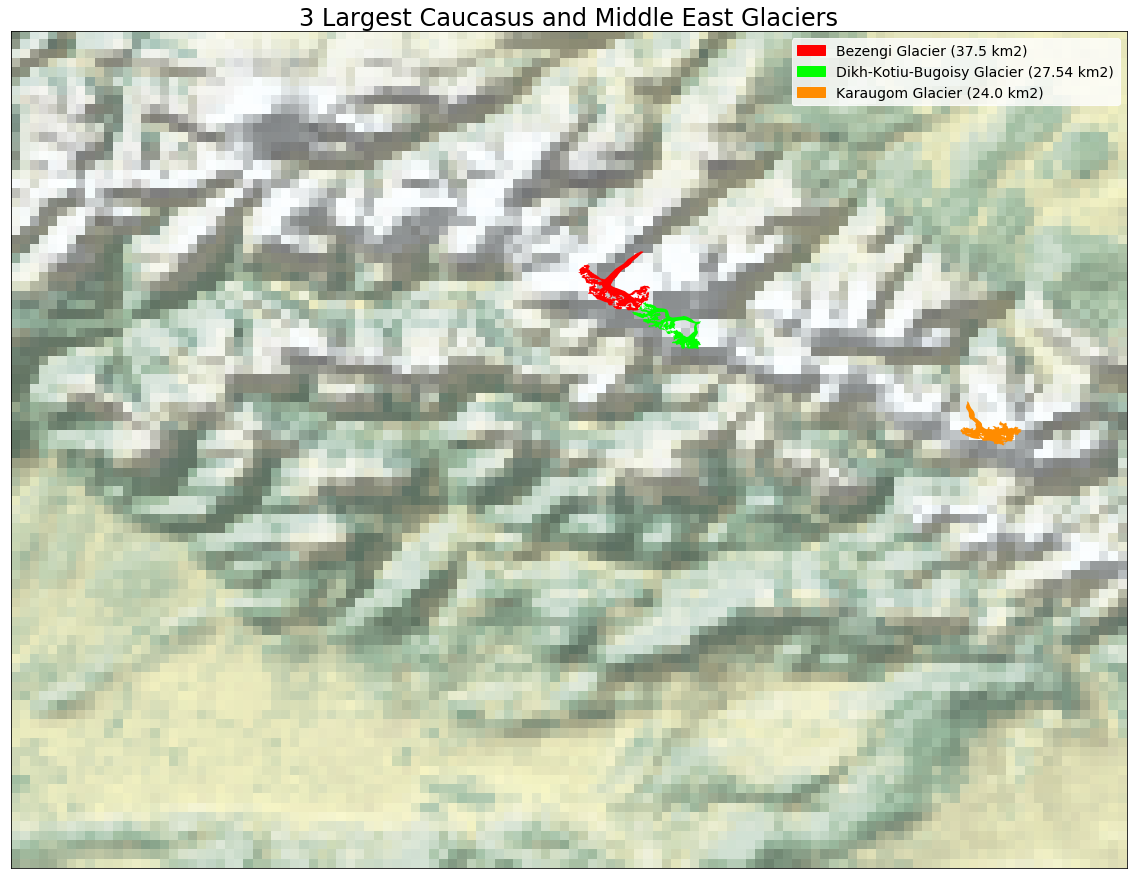

In [20]:
# Check that the geodataframe wasn't corrupted from these changes by plotting the data
# Plot 3 largest glaciers on natural earth from GLIMS
# Set up legend. Note that the sizes come from an average of GLIMS and RGI. 
# See wgms-glacier-project/data/comparison/compare-glims-rgi.xlsx
legend_colors = ['red', 'lime', 'darkorange']
legend_labels = [final_data_df['glac_name'][0] + ' (' + str(round(final_data_df['area_km2'][0], 2)) + ' km2)',
                 final_data_df['glac_name'][1] + ' (' + str(round(final_data_df['area_km2'][1], 2)) + ' km2)',
                 final_data_df['glac_name'][2] + ' (' + str(round(final_data_df['area_km2'][2], 2)) + ' km2)']
legend_patches = [Patch(color=icolor, label=label)
                  for icolor, label in zip(legend_colors, legend_labels)]

# Set up plot space
fig, ax = plt.subplots(figsize=(20,20))
minx, miny, maxx, maxy = region_outline.total_bounds
# Zoom in
miny = 42.0
maxy = 43.5
minx = 42.0
maxx = 44.0
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot natural earth basemap
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot 3 largest glaciers from glims dataframe
final_data_df.iloc[0:1].plot(ax=ax, color='red')
final_data_df.iloc[1:2].plot(ax=ax, color='lime')
final_data_df.iloc[2:3].plot(ax=ax, color='darkorange')
ax.set_title('3 Largest ' + region_name + ' Glaciers', fontsize=24)
# Plot legend
ax.legend(handles=legend_patches,
         facecolor ="white",
         edgecolor = "white",
         fontsize = 14,
         bbox_to_anchor = (1.0,1.0))

plt.show()

### Create shapefile from the final dataframe

In [21]:
# Write dataframe to shapefile and save to zip if it doesn't already exist
zipfile_fn = "data/final-dataset/region-" + region_number + "-largest-glaciers.zip"
if os.path.exists(zipfile_fn) == False:
    # Create the shapefile
    final_data_fn = "data/final-dataset/region-" + region_number + "-largest-glaciers.shp"
    final_data_df.to_file(driver='ESRI Shapefile', filename=final_data_fn)
    
    # Zip up the shapefile
    zipfile_fn = ws.zipshp(final_data_fn, Delete=True)
    print("Creating zipfile: " + zipfile_fn)
else:
    print(zipfile_fn + " already extists")

Creating zipfile: data/final-dataset\region-12-largest-glaciers.zip
